# CHAPTER 4 - DATA IO USING NUMPY AND PANDAS

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NumPy" data-toc-modified-id="NumPy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NumPy</a></span></li><li><span><a href="#Pandas" data-toc-modified-id="Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pandas</a></span></li><li><span><a href="#Interpolation" data-toc-modified-id="Interpolation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interpolation</a></span><ul class="toc-item"><li><span><a href="#Linear-Interpolation" data-toc-modified-id="Linear-Interpolation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Interpolation</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

In Part 1 Design and Computing you wrote functions to import hydrostatic data from a file. This used text based read functions such as the **fileobject.read** method. The NumPy and pandas modules have a number of function which make importing data much simpler.

## 1 NumPy
The numpy `loadtxt` function allows you to import a file as an **array**. The issue with this is that the data is imported into an array of a single data type, and although you can specify the data type when you import the file, sometimes this makes reading the data difficult.

The example below shows how to import data from a comma seperated variables (CSV) file. Start by looking at the help for this function.

CSV is a comma-separated value file format that can be opened with tet or Excel. 

CSV files store table data in text, which means that the file is a sequence of characters and does not contain data. 

### 1.1 loadtxt

In [4]:
import numpy as np
data = np.loadtxt('Example1.csv', dtype='float', delimiter=',', usecols=range(0,3), skiprows=1)  #usecols = （1,4,5）
'''  Example1.csv is the file you want to import
     dtype specifies the format the data will be imported as
     delimiter spcifies the that the file is comma seperated
     usecols specifies the range of columns to import
     skiprows spcifies the number of rows to ignore, useful if you have headers
''' 
print('data=\n',np.shape(data)) # print (np.shape(data))
print('data=\n',data)

data=
 (10, 3)
data=
 [[ 0.000e+00  0.000e+00  8.000e-03]
 [ 5.000e+00 -3.000e-01  1.600e-02]
 [ 1.000e+01 -5.940e-01  4.000e-02]
 [ 1.500e+01 -8.760e-01  7.800e-02]
 [ 2.000e+01 -1.139e+00  1.270e-01]
 [ 2.500e+01 -1.378e+00  1.840e-01]
 [ 3.000e+01 -1.592e+00  2.430e-01]
 [ 3.500e+01 -1.777e+00  3.010e-01]
 [ 4.000e+01 -1.932e+00  3.520e-01]
 [ 4.500e+01 -2.058e+00  3.920e-01]]


What happens if you have missing data in your file. The file **Example2.csv** is the same as **Example1.csv** except that it has missing values at 25 and 40 degrees (line 7 and 10). Try opening this file using the `np.loadtxt` function that you used above. **Note: You will get an error, so comment out the code cell below after you have run it**

In [9]:
# data = np.loadtxt('Example2.csv', dtype='float', delimiter= ',', usecols=range(0,3), skiprows=1)
# import os
# os.getcwd()
# np.loadtxt('Example2.csv', dtype='float', delimiter=',', skiprows=1, usecols=range(0,3))

### 1.2 genfromtxt

You should have generated an error. In this case it is better to use the NumPy function `genfromtxt`. This function allows you to specify something to fill any missing values with, in this case 'NaN' which is used to represent Not a Number.

Now comment out the code above so it doesn't prevent the rest of the notebook from running.

**需要将空格的内容替换为一些字符串，使用`filling_values`选项，否则会报错**

In [3]:
data = np.genfromtxt('Example2.csv', dtype='float', delimiter= ',', usecols=range(0,3), skip_header=1, filling_values = 'nan')
print('data=\n',data)

data=
 [[ 0.000e+00  0.000e+00  8.000e-03]
 [ 5.000e+00 -3.000e-01  1.600e-02]
 [ 1.000e+01 -5.940e-01  4.000e-02]
 [ 1.500e+01 -8.760e-01  7.800e-02]
 [ 2.000e+01 -1.139e+00  1.270e-01]
 [ 2.500e+01        nan  1.840e-01]
 [ 3.000e+01 -1.592e+00  2.430e-01]
 [ 3.500e+01 -1.777e+00  3.010e-01]
 [ 4.000e+01 -1.932e+00        nan]
 [ 4.500e+01 -2.058e+00  3.920e-01]]


If you try to plot this data you will see that there are gaps in the curves.

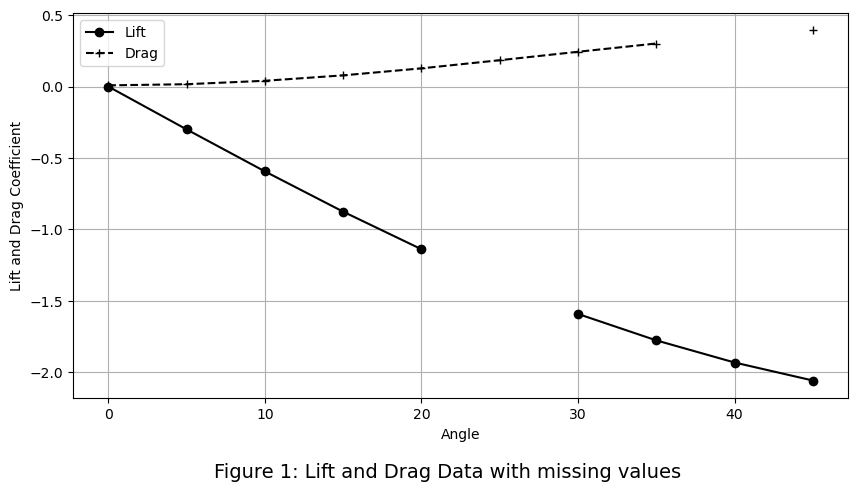

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(data[:,0],data[:,1],'ko-')
plt.plot(data[:,0],data[:,2],'k+--')
plt.xlabel('Angle')
plt.ylabel('Lift and Drag Coefficient')
plt.legend(['Lift','Drag'])
plt.grid('on')
cap1='Figure 1: Lift and Drag Data with missing values'
plt.figtext(0.5, -0.05, cap1, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

There are a number of function you can use to determine if there are NaN values and their location in the array. 
1. An example is the NumPy `isnan` function which returns a boolean array(布尔数组） where true values indicate NaNs.
2. The NumPy `argwhere` function can be used to return an array of the locations which meet some condition. In this case `np.argwhere(np.isnan(data))` returns the array locations where the array data is NaN. 

In [5]:
nanid = np.argwhere(np.isnan(data)) # nanid is the index of the NaN, nanid[:,0] is the row numberof 
print(nanid,'\n') # print the index values of missing data 
print(data[nanid[:,0],0]) # print the angles with missing data 

[[5 1]
 [8 2]] 

[25. 40.]


Once we know the location of the NaN values, we can delete the whole row or replace them with interpolated values.

In [6]:
data1 = np.delete(data,nanid[:,0],0)  # nanid[:,0]  is the row numberof index ; 0  delete the row, 1 delete the column
print('Data with deleted NaNs = \n',data1,'\n')
print('Data  = \n',data,'\n')

from scipy.interpolate import interp1d # this is a 1 degree interpolation function
f = interp1d(data1[:,0], data1[:,1:3], axis=0) 
# 对删掉行之后的第一、二、三列进行插值，default method is linear interpolation ,axis=0 指定插值的轴
data[:,1:3] = f(data[:,0]) # 将原始data数据中的index-data[:,0]输入到f函数中，即可得到缺失数据的值，并赋予给data数组中。

print('Interpolated data = \n',data[:,2],'\n')
print('Interpolated data = \n',data,'\n')

Data with deleted NaNs = 
 [[ 0.000e+00  0.000e+00  8.000e-03]
 [ 5.000e+00 -3.000e-01  1.600e-02]
 [ 1.000e+01 -5.940e-01  4.000e-02]
 [ 1.500e+01 -8.760e-01  7.800e-02]
 [ 2.000e+01 -1.139e+00  1.270e-01]
 [ 3.000e+01 -1.592e+00  2.430e-01]
 [ 3.500e+01 -1.777e+00  3.010e-01]
 [ 4.500e+01 -2.058e+00  3.920e-01]] 

Data  = 
 [[ 0.000e+00  0.000e+00  8.000e-03]
 [ 5.000e+00 -3.000e-01  1.600e-02]
 [ 1.000e+01 -5.940e-01  4.000e-02]
 [ 1.500e+01 -8.760e-01  7.800e-02]
 [ 2.000e+01 -1.139e+00  1.270e-01]
 [ 2.500e+01        nan  1.840e-01]
 [ 3.000e+01 -1.592e+00  2.430e-01]
 [ 3.500e+01 -1.777e+00  3.010e-01]
 [ 4.000e+01 -1.932e+00        nan]
 [ 4.500e+01 -2.058e+00  3.920e-01]] 

Interpolated data = 
 [0.008  0.016  0.04   0.078  0.127  0.185  0.243  0.301  0.3465 0.392 ] 

Interpolated data = 
 [[ 0.0000e+00  0.0000e+00  8.0000e-03]
 [ 5.0000e+00 -3.0000e-01  1.6000e-02]
 [ 1.0000e+01 -5.9400e-01  4.0000e-02]
 [ 1.5000e+01 -8.7600e-01  7.8000e-02]
 [ 2.0000e+01 -1.1390e+00  1.2700e-

Now you can plot the results without gaps in the curves.

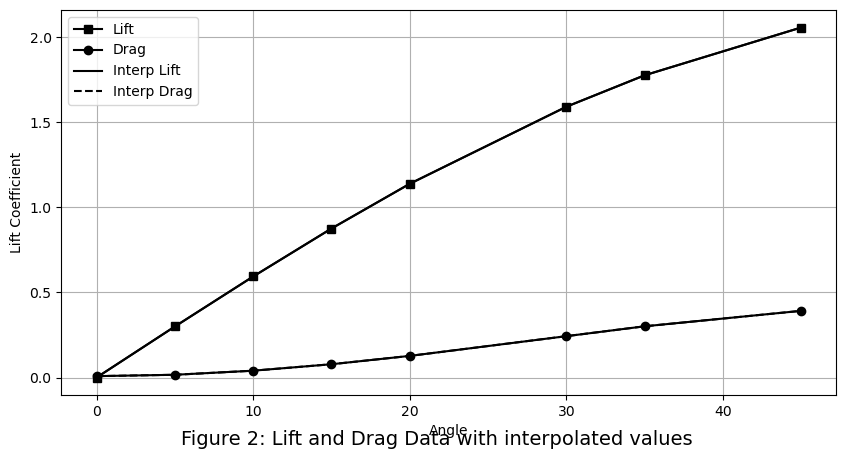

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(data1[:,0],abs(data1[:,1]),'ks-')
plt.plot(data1[:,0],abs(data1[:,2]),'ko-')

plt.plot(data[:,0],abs(data[:,1]),'k-')
plt.plot(data[:,0],abs(data[:,2]),'k--')
plt.xlabel('Angle')
plt.ylabel('Lift Coefficient')
plt.legend(['Lift','Drag','Interp Lift','Interp Drag'])
plt.grid('on')

cap2='Figure 2: Lift and Drag Data with interpolated values'
plt.figtext(0.5, 0.01, cap2, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

You can calculate a range of summary statistics for your array using standard numpy functions or methods.

In [8]:
print('Column Statistics')
print('Sum =',data.sum(axis=0))  # 每一列求和，输出矩阵为一行，
print('Mean =',data.mean(axis=0)) # 每一列求平均值
print('Stdev = ',data.std(axis=0)) # 每一列的标准差（standard deviation）
print('Min =',data.min(axis=0)) # 每一列求最大、小值
print('Max =',data.max(axis=0))

Column Statistics
Sum = [225.     -11.619    1.7365]
Mean = [22.5     -1.1619   0.17365]
Stdev =  [14.36140662  0.66905683  0.13423525]
Min = [ 0.    -2.058  0.008]
Max = [45.     0.     0.392]


At some point you will want to save numpy array to file

You can dump the whole array to a csv file using `savetxt` function.

In [9]:
np.savetxt('Example2_Numpy.csv',data, fmt='%10.4f' ,delimiter=',') # Saves to a comma separated variable (CSV) file

## 2 Pandas

Pandas is a package created specifically for data analsys. It is much more suitable for working with data in a table format known as a data frame which consists of different data types. It also has a number of methods and functions for manipulating data.

The standard procedure for importing pandas and the DataFrame specifically is as follows:

Just like NumPy, Pandas has a function for reading in csv files, `pd.read_csv`. By default, this function creates an integer index for each row of the dataframe. You can also set it to use the data in any specified column as the index. Look at the difference between dataframes df1 and df2 created below.


In [10]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame # DataFrame is used so frequently it is imported specifically
import pandas as pd
df1 = pd.read_csv('Example2.csv') # reads csv file
df2 = pd.read_csv('Example2.csv', index_col = 0) # reads csv file, the first column is regared as index
print('df1 = \n',df1,'\n')
print('df2 = \n',df2,'\n')

df1 = 
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
5     25    NaN  0.184
6     30 -1.592  0.243
7     35 -1.777  0.301
8     40 -1.932    NaN
9     45 -2.058  0.392 

df2 = 
           Cy     Cx
Angle              
0      0.000  0.008
5     -0.300  0.016
10    -0.594  0.040
15    -0.876  0.078
20    -1.139  0.127
25       NaN  0.184
30    -1.592  0.243
35    -1.777  0.301
40    -1.932    NaN
45    -2.058  0.392 



In the first case it creates an index column with integer values from 0 to 9, in the second case it uses the angles as the index column.

The second case is useful if you want to return the Cy value at a particular angle, say 20 degrees.

In [11]:
print('Cy from df1 at index 4 =',df1.Cy[4],'\n') # returns the Cy value from df1 at the index value of 4
print('Cy from df2 at angle 20 =',df2.Cy[20],'\n') # returns the Cy value from df2 at an index value of 20 degrees

Cy from df1 at index 4 = -1.139 

Cy from df2 at angle 20 = -1.139 



In a jupyter notebook, if you call the dataframe rather than print the dataframe it will produce a nicely formated table.

In [12]:
df1

,Angle,Cy,Cx
0,0,0.000,0.008
1,5,-0.300,0.016
2,10,-0.594,0.040
3,15,-0.876,0.078
4,20,-1.139,0.127
5,25,NaN,0.184
6,30,-1.592,0.243
7,35,-1.777,0.301
8,40,-1.932,NaN
9,45,-2.058,0.392


In [13]:
df2

,Cy,Cx
Angle,,
0,0.000,0.008
5,-0.300,0.016
10,-0.594,0.040
15,-0.876,0.078
20,-1.139,0.127
25,NaN,0.184
30,-1.592,0.243
35,-1.777,0.301
40,-1.932,NaN


You can call the column of data using the column name eg df1['Cy'], or df1.Cy

You can call rows of data using the index such as df1[1:3], which will return rows corresponding to index 1 and 2. 

In [14]:
print(df1['Cy']) #select the Cy column
print(df2['Cy']) #select the Cy column

0    0.000
1   -0.300
2   -0.594
3   -0.876
4   -1.139
5      NaN
6   -1.592
7   -1.777
8   -1.932
9   -2.058
Name: Cy, dtype: float64
Angle
0     0.000
5    -0.300
10   -0.594
15   -0.876
20   -1.139
25      NaN
30   -1.592
35   -1.777
40   -1.932
45   -2.058
Name: Cy, dtype: float64


In [15]:
print('Cy = \n',df1.Cy,'\n') #Select the Cy column
print('Cx = \n',df1.Cx) #Select the Cx column

Cy = 
 0    0.000
1   -0.300
2   -0.594
3   -0.876
4   -1.139
5      NaN
6   -1.592
7   -1.777
8   -1.932
9   -2.058
Name: Cy, dtype: float64 

Cx = 
 0    0.008
1    0.016
2    0.040
3    0.078
4    0.127
5    0.184
6    0.243
7    0.301
8      NaN
9    0.392
Name: Cx, dtype: float64


In [16]:
df1[0:3] # Select rows 2-3 or index 1 and 2

,Angle,Cy,Cx
0,0,0.000,0.008
1,5,-0.300,0.016
2,10,-0.594,0.040


There is also a special index field **iloc**, which allows you to select a subset of the rows and columns from the dataframe by specifying the integer location.


In [17]:
df1.iloc[2] #Selects index 2 from df1

Angle    10.000
Cy       -0.594
Cx        0.040
Name: 2, dtype: float64

In [18]:
df1.iloc[:,2] #Selects column 3

0    0.008
1    0.016
2    0.040
3    0.078
4    0.127
5    0.184
6    0.243
7    0.301
8      NaN
9    0.392
Name: Cx, dtype: float64

In [19]:
print(df1.index,'\n') #returns the index as this is not a column
print(df2.index)

RangeIndex(start=0, stop=10, step=1) 

Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Angle')


In [20]:
df1.iloc[2,2] #Selects row 3, column 3

0.04

In [21]:
print(df1.iloc[5:8, 2],'\n')#return the values from the data frame in rows 6 to 9 (index 5 to 8) in column 3
print(df1.loc[5:7,'Cx'],'\n') # Produced the same as above

5    0.184
6    0.243
7    0.301
Name: Cx, dtype: float64 

5    0.184
6    0.243
7    0.301
Name: Cx, dtype: float64 



### 2.1 x.dropna()

Pandas has a number of methods for dealing with missing data. These include dropping NAN values using `df1.dropna()`.
A NAN is short for Not A Number

Unless you redefine the data frame, these operations such as dropna don't actually change the data frame. So in the example below `df1.dropna()` has not removed any NaN values from the dataframe, only excluded them. So when you call df1 again, it shows the original values. This is really important, as it allows you to perform calculations and analysis without changing the original data.

If you want to change the data, you can re-define the dataframe.

In [22]:
print('df1 =\n',df1,'\n')
print('df1 without NaN values =\n',df1.dropna())
print('df1 =\n',df1,'\n')
df2=df1.dropna()
print('df2 =\n',df2)

df1 =
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
5     25    NaN  0.184
6     30 -1.592  0.243
7     35 -1.777  0.301
8     40 -1.932    NaN
9     45 -2.058  0.392 

df1 without NaN values =
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
6     30 -1.592  0.243
7     35 -1.777  0.301
9     45 -2.058  0.392
df1 =
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
5     25    NaN  0.184
6     30 -1.592  0.243
7     35 -1.777  0.301
8     40 -1.932    NaN
9     45 -2.058  0.392 

df2 =
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
6     30 -1.592  0.243
7     35 -1.777  0.301
9     45 -2.058  0.392


### 2.2 x.fillna(method='ffill')， x.fillna(method='bfill') , x.fillna(100)

Any missing or NAN values can be filled using the `df1.fillna(method='ffill')` method, which will replace any missing values with the previous value in the column.

ffill means forward fill ie use previous value in the next empty/ NAN value

bfill means back fill ie use the next value to fill a previous empty/ NAN value.

Alternatively, you can specifiy a constant value to fill any missing values eg `df1.fillna(100)` will replace any missing values with 100. Or use a function such as `df1.fillna(df1.mean())`

In [23]:
print('df1 using ffill = \n',df1.fillna(method='ffill'),'\n')
print('df1 using bfill = \n',df1.fillna(method='bfill'),'\n')
print('df1 =\n',df1,'\n')
df3=df1.fillna(method='bfill')
print('df3 =\n',df3,'\n')
print('df1 using constant value = \n',df1.fillna(100),'\n')
print('Calculate column mean values =\n',df1.mean(),'\n') # the mean values except the NaN row
print('df1 using column mean value = \n',df1.fillna(df1.mean()),'\n')

df1 using ffill = 
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
5     25 -1.139  0.184
6     30 -1.592  0.243
7     35 -1.777  0.301
8     40 -1.932  0.301
9     45 -2.058  0.392 

df1 using bfill = 
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
5     25 -1.592  0.184
6     30 -1.592  0.243
7     35 -1.777  0.301
8     40 -1.932  0.392
9     45 -2.058  0.392 

df1 =
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
5     25    NaN  0.184
6     30 -1.592  0.243
7     35 -1.777  0.301
8     40 -1.932    NaN
9     45 -2.058  0.392 

df3 =
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
5     25 -1.592  0.184
6     30 -1.592  0.2

## 3 Interpolation

Both NumPy and Pandas have built in interpolation methods, and some which allow extrapolation. These are very powerful and efficient methods of finding missing values or intermediate values. But you need to understand how they work in order to understand the limitations of the different methods. 

Or you can replace missing or NA values with interpolated values using various interpolation methods including linear and cubic splines.

Note: You should also note that Microsoft excel doesn't have any interpolation functions so the best you can do is use the trendline but this is a regresssion method (回归方法） rather than interpolation （插值）.

### 3.1 Linear Interpolation

You are probably already familiar with linear interpolation.

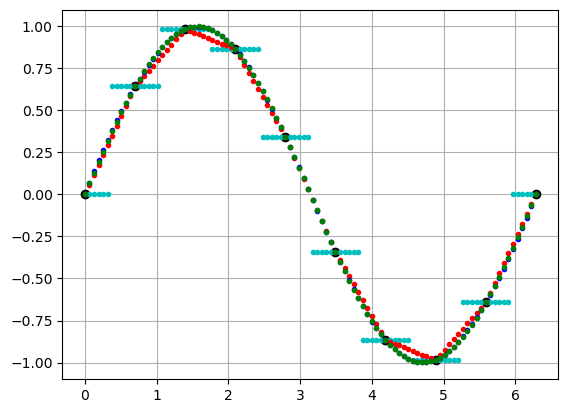

In [24]:
from scipy.interpolate import interp1d
x=np.linspace(0,2*np.pi,10)
y=np.sin(x)
plt.plot(x,y,'ko')
plt.grid()

xi=np.linspace(0,2*np.pi,100)
fnearest=interp1d(x,y,kind='nearest')
flinear=interp1d(x,y,kind='linear')
fquadratic=interp1d(x,y,kind='quadratic')  # 二次插值
fcubic=interp1d(x,y,kind='cubic') # 三次样条插值

yinearest=fnearest(xi)
yilinear=flinear(xi)
yiquadratic=fquadratic(xi)
yicubic=fcubic(xi)

plt.plot(xi,yinearest,'c.')  # cyan青色
plt.plot(xi,yilinear,'r.')
plt.plot(xi,yiquadratic,'b.')
plt.plot(xi,yicubic,'g.')

In [25]:
print('df1 =\n',df1,'\n')
print((df1.interpolate(method='linear')),'\n\n')  #利用此方法可直接补上NaN
print(df1.interpolate(method='cubic'))

df1 =
    Angle     Cy     Cx
0      0  0.000  0.008
1      5 -0.300  0.016
2     10 -0.594  0.040
3     15 -0.876  0.078
4     20 -1.139  0.127
5     25    NaN  0.184
6     30 -1.592  0.243
7     35 -1.777  0.301
8     40 -1.932    NaN
9     45 -2.058  0.392 

   Angle      Cy      Cx
0      0  0.0000  0.0080
1      5 -0.3000  0.0160
2     10 -0.5940  0.0400
3     15 -0.8760  0.0780
4     20 -1.1390  0.1270
5     25 -1.3655  0.1840
6     30 -1.5920  0.2430
7     35 -1.7770  0.3010
8     40 -1.9320  0.3465
9     45 -2.0580  0.3920 


   Angle        Cy        Cx
0      0  0.000000  0.008000
1      5 -0.300000  0.016000
2     10 -0.594000  0.040000
3     15 -0.876000  0.078000
4     20 -1.139000  0.127000
5     25 -1.378553  0.184000
6     30 -1.592000  0.243000
7     35 -1.777000  0.301000
8     40 -1.932000  0.352721
9     45 -2.058000  0.392000


If we return to the lift and drag data from earlier. Previously, the graph had a gap  where data was missing. Using the interpolation method the graph below can be plotted without a gap.

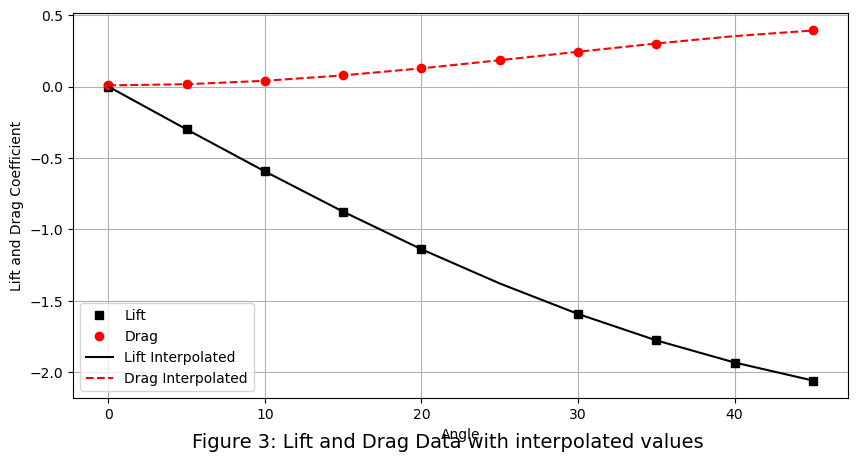

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
df1["CyA"]=df1.Cy.interpolate(method='cubic') # adds the interpolated values of df1.Cy to a new column called CyA
df1["CxA"]=df1.Cx.interpolate(method='cubic') # adds the interpolated values of df1.Cx to a new column called CxA

plt.figure(figsize=(10,5))
plt.plot(df1.Angle,df1.Cy,'ks')
plt.plot(df1.Angle,df1.Cx,'ro')


plt.plot(df1.Angle,df1.CyA,'k-')
plt.plot(df1.Angle,df1.CxA,'r--')

plt.xlabel('Angle')
plt.ylabel('Lift and Drag Coefficient')
plt.legend(['Lift','Drag','Lift Interpolated','Drag Interpolated'])
plt.grid('on')

cap3='Figure 3: Lift and Drag Data with interpolated values'
plt.figtext(0.5, 0.01, cap3, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

Here are some useful methods to use on data frames:

`df1.loc` allows label based access to rows and columns

In [27]:
df1.loc[:,'Cy'] #returns the column using a label address

0    0.000
1   -0.300
2   -0.594
3   -0.876
4   -1.139
5      NaN
6   -1.592
7   -1.777
8   -1.932
9   -2.058
Name: Cy, dtype: float64

In [28]:
df1.loc[abs(df1.Cy) > 1] # returns values from the dataframe when absolute values of Cy are greater than 1

,Angle,Cy,Cx,CyA,CxA
4,20,-1.139,0.127,-1.139,0.127000
6,30,-1.592,0.243,-1.592,0.243000
7,35,-1.777,0.301,-1.777,0.301000
8,40,-1.932,NaN,-1.932,0.352721
9,45,-2.058,0.392,-2.058,0.392000


In [29]:
df1.sort_values(by = ['Cy'],ascending=False) 
# sort the values in the dataframe by the Cy values. It puts any NaN values at the end.

,Angle,Cy,Cx,CyA,CxA
0,0,0.000,0.008,0.000000,0.008000
1,5,-0.300,0.016,-0.300000,0.016000
2,10,-0.594,0.040,-0.594000,0.040000
3,15,-0.876,0.078,-0.876000,0.078000
4,20,-1.139,0.127,-1.139000,0.127000
6,30,-1.592,0.243,-1.592000,0.243000
7,35,-1.777,0.301,-1.777000,0.301000
8,40,-1.932,NaN,-1.932000,0.352721
9,45,-2.058,0.392,-2.058000,0.392000
5,25,NaN,0.184,-1.378553,0.184000


### 3.2 read_excel

It is often more convenient to store data in an excel spreadsheet which can then be imported and analysed in python. Use the Pandas `read_excel` function to import the data from a sheet within a spreadsheet. Look at the help for this function.

Note if you get an error about a missing xlrd package, then close all jupyter notebooks and run the following code in the anaconda prompt: **Conda install xlrd**. Then restart jupyter notebooks and it should now work.

Below you can see the difference between printing the imported dataframe df and just displaying the dataframe.

In [30]:
#help(pd.read_excel)
df3 = pd.read_excel('RudderExpData.xlsx', sheet_name ='J=0.94')

In [31]:
print((df3))

    Angle     Cl     Cd      Cpc       Cps      Cmz    Cmx       Cmy
0   -30.8 -1.245  0.481   35.726   49.5091 -0.07600 -0.850  0.296000
1   -25.8 -1.484  0.329   27.982   49.1283  0.03000 -0.988  0.221000
2   -20.8 -1.299  0.208   23.430   46.7435  0.08400 -0.831  0.143000
3   -15.8 -0.973  0.119   21.525   45.6152  0.08200 -0.610  0.089000
4   -10.8 -0.657  0.066   20.554   43.9380  0.06200 -0.401  0.055000
5    -5.8 -0.349  0.042   19.867   40.4896  0.03600 -0.201  0.037000
6    -3.8 -0.238  0.032   21.612   37.1357  0.02000 -0.129  0.032000
7    -2.8 -0.175  0.033   23.600   34.3931  0.01100 -0.090  0.030000
8    -1.8 -0.120  0.034   26.113   28.2231  0.00500 -0.055  0.029000
9    -0.8 -0.065  0.033   34.270   11.5431 -0.00267 -0.019  0.029333
10    0.2 -0.003  0.036  556.886 -911.1060 -0.01300  0.022  0.030000
11    1.2  0.052  0.037  -10.759   94.8657 -0.02200  0.059  0.030000
12    2.2  0.107  0.038    1.988   68.1389 -0.03000  0.092  0.031000
13    4.2  0.200  0.050   12.700  

In [32]:
df3

,Angle,Cl,Cd,Cpc,Cps,Cmz,Cmx,Cmy
0,-30.8,-1.245,0.481,35.726,49.5091,-0.07600,-0.850,0.296000
1,-25.8,-1.484,0.329,27.982,49.1283,0.03000,-0.988,0.221000
2,-20.8,-1.299,0.208,23.430,46.7435,0.08400,-0.831,0.143000
3,-15.8,-0.973,0.119,21.525,45.6152,0.08200,-0.610,0.089000
4,-10.8,-0.657,0.066,20.554,43.9380,0.06200,-0.401,0.055000
5,-5.8,-0.349,0.042,19.867,40.4896,0.03600,-0.201,0.037000
6,-3.8,-0.238,0.032,21.612,37.1357,0.02000,-0.129,0.032000
7,-2.8,-0.175,0.033,23.600,34.3931,0.01100,-0.090,0.030000
8,-1.8,-0.120,0.034,26.113,28.2231,0.00500,-0.055,0.029000
9,-0.8,-0.065,0.033,34.270,11.5431,-0.00267,-0.019,0.029333


You can plot the data in the dataframe using the normal matplotlib plot commands, or using the plot methods for the dataframe. It is easier to control the plot using the matplotlib plot commands.

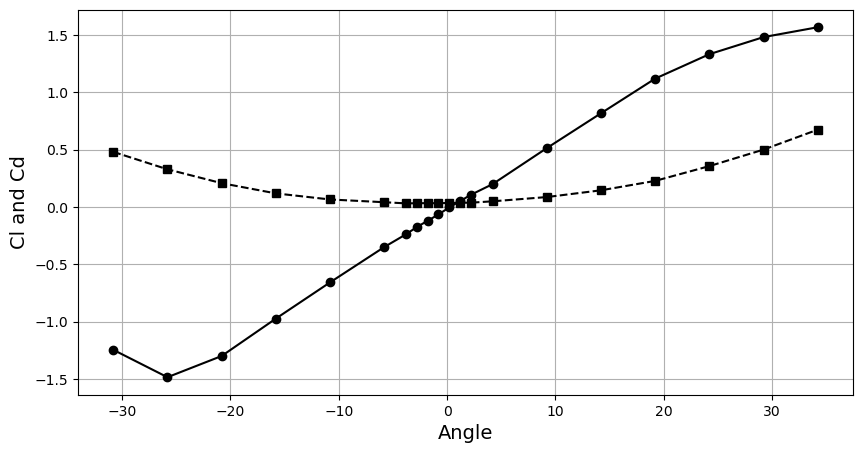

In [33]:
# Matplotlib
plt.figure(figsize=(10,5))
plt.plot(df3.Angle,df3.Cl,'ko-')
plt.plot(df3.Angle,df3.Cd,'ks--')
plt.xlabel('Angle',fontsize=14)
plt.ylabel('Cl and Cd',fontsize=14)
plt.grid('on')

Or you can use the dataframe plot methods. By default every instance of data frame plot produces a new graph. 


<Axes: xlabel='Angle'>

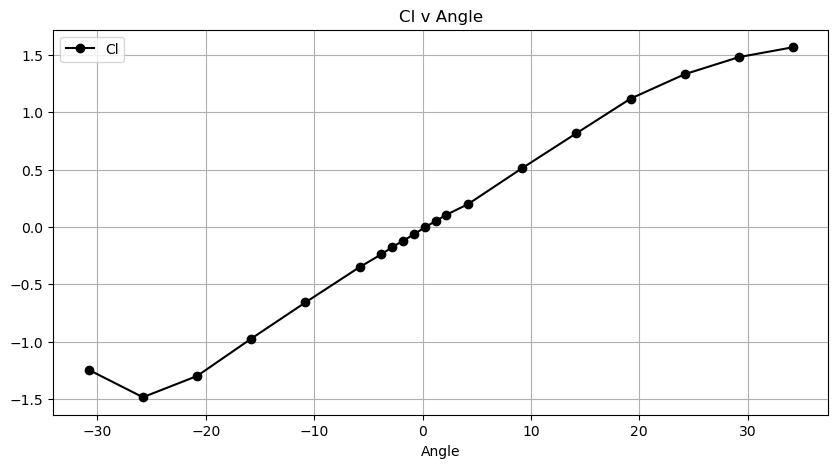

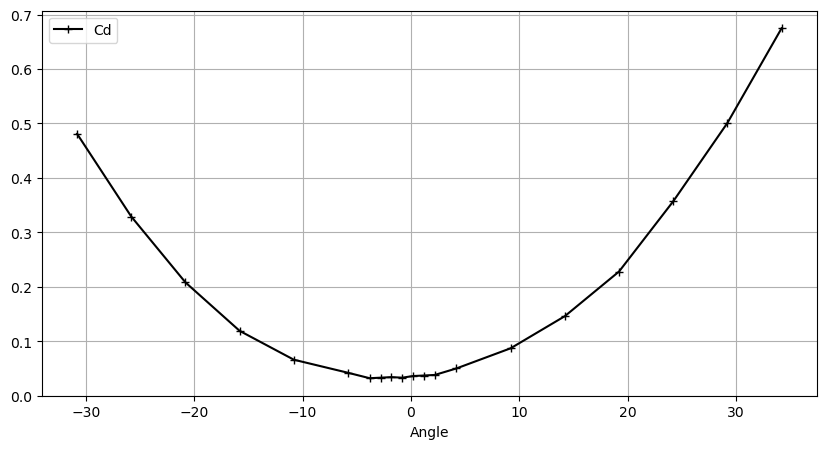

In [34]:
df3.plot('Angle','Cl',kind='line',style='ko-',grid='on',title='Cl v Angle',figsize=(10,5))
df3.plot('Angle','Cd',kind='line',style='k+-',grid='on',figsize=(10,5)) # produces a new plot

You can plot multiple plots on one set of axes by using the ax parameter.

<Axes: title={'center': 'Cl v Angle'}, xlabel='Angle'>

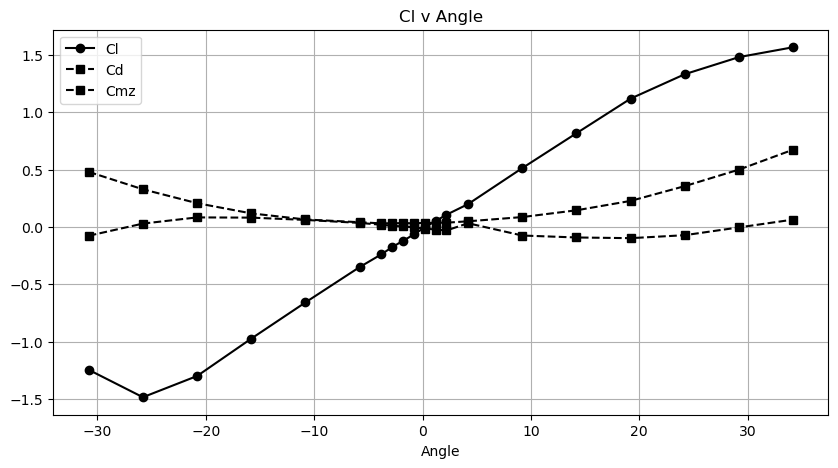

In [35]:
#Dataframe Plot on single axes
ax=df3.plot('Angle','Cl',kind='line',style='ko-',grid='on',title='Cl v Angle',figsize=(10,5)) 
df3.plot('Angle','Cd',kind='line',style='ks--',grid='on',ax=ax)
df3.plot('Angle','Cmz',kind='line',style='ks--',grid='on',ax=ax)

You can quickly calculate summary statistics for the whole data frame using `df3.describe()` or for a single column, such as Cl, using `df3.Cl.describe()`. You can calculate specific statistics including the folloing:
- count
- describe
- min, max
- sum
- mean
- median
- mad
- var
- std

In [36]:
df3.describe()

,Angle,Cl,Cd,Cpc,Cps,Cmz,Cmx,Cmy
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.950000,0.029300,0.176600,48.011450,0.007920,-0.002583,0.047350,0.111317
std,17.383825,0.909086,0.192669,120.261034,215.043443,0.056707,0.623378,0.115182
min,-30.800000,-1.484000,0.032000,-10.759000,-911.106000,-0.097000,-0.988000,-0.008000
25%,-7.050000,-0.426000,0.036750,19.654000,39.651125,-0.040250,-0.251000,0.030000
50%,-0.300000,-0.034000,0.076500,22.521000,49.318700,0.001165,0.001500,0.053500
75%,10.450000,0.590000,0.253250,28.436000,52.161875,0.033750,0.409500,0.159250
max,34.200000,1.568000,0.675000,556.886000,94.865700,0.084000,1.154000,0.402000


In [37]:
df3.Cl.describe()

count    20.000000
mean      0.029300
std       0.909086
min      -1.484000
25%      -0.426000
50%      -0.034000
75%       0.590000
max       1.568000
Name: Cl, dtype: float64

In [38]:
print('Return the mean of column Cl = ',df3.Cl.mean(),'\n') # or just the mean
print('Calculate the mean of column Cl = ',df3.Cl.sum()/df3.Cl.count(),'\n') # or calculate the mean

Return the mean of column Cl =  0.029299999999999982 

Calculate the mean of column Cl =  0.029299999999999982 



### 3.3 Output to CSV

Pandas allows easy output to CSV files using the **to_csv** function. Look at the help on this function for more details

In [39]:
df3.to_csv('RudderExpData_out.csv',sep=',', index=False) #index=False will omit the index column

Output to excel file

Pandas also allows easy output to an excel file using the `to_excel` function.

or use the excel writer.

`with ExcelWriter('path_to_file.xlsx') as writer:
    df.to_excel(writer)`


In [40]:
df3.to_excel('RudderExpData_out.xlsx',index=False) #index=False will omit the index column

In [41]:
with pd.ExcelWriter('ExcelWriter.xlsx') as writer: # An alternative method used the excelwriter funtion
    df3.to_excel(writer)

If you want to write to multiple excel sheets then use the excelwriter function to create the file first:

`with ExcelWriter('path_to_file.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Sheet1')
    df2.to_excel(writer, sheet_name='Sheet2')`

In [42]:
with pd.ExcelWriter('path_to_file.xlsx') as writer:  # 将三个表合成一个表的不同sheet
    df1.to_excel(writer, sheet_name='Sheet1', index=False, startrow = 3, startcol = 4)
    df2.to_excel(writer, sheet_name='Sheet2', index=False, startrow = 3, startcol = 4)
    df3.to_excel(writer, sheet_name='Sheet3', index=False, startrow = 3, startcol = 4)

## 4 Exercise

Instructions	
1. Download the spreadsheet ExerciseData.xlsx.
2. Import sheet1 into a DataFrame using the `read_excel` function.
3. Answer the following questions.
4. Give all answers rounded to 3 decimal places.

###  Question 1

What is the mean of Run 25 (excluding NaN values)?

###  Question 2

In the column for Run 25 replace any missing values with the mean for Run 25.

Calculate the mean of Run 25 for row index numbers 100 to 500. ie Run25[100:500]

###  Question 3

What is the mean of means for the original dataframe, ie including NaN values?

###  Question 4

Replace any NaN values in the whole dataframe with 0 values.

Calculate the mean of means of the new dataframe

###  Question 5

What is the maximum value in the whole dataframe?

###  Question 6

Plot a histogram of the original Run 25 data. Using the option bins=10,

Determine which bin has the highest value.

###  Question 7

Plot a histogram of the mean of each column.

Use 10 bins (bins=10)

Which bin has the highest value?

### Question 8

What is the minimum number of data points (count)  in any of the columns?